<h3>Training a Multiclass Classification Model with Four Distinct Classes</h3>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import sigmoid, relu, linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_blobs

In [15]:
# make 4-class dataset for classification
classes = 4
m = 1000
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, Y_train = make_blobs(
    n_samples=m, 
    centers=centers, 
    cluster_std=std,
    random_state=30
)
print(X_train[:20])
print(Y_train[:20])

[[-1.64483186 -1.78337824]
 [ 4.55676763 -2.65709901]
 [-0.91955872 -1.77709518]
 [-2.6263052  -2.87692809]
 [-4.77099194  1.86184408]
 [-1.60504845 -3.10945563]
 [ 3.58611031 -2.57995292]
 [-1.28675183 -2.89279106]
 [ 0.38804594  2.45203991]
 [ 6.85762089 -2.96010758]
 [ 0.52284831  1.15872737]
 [ 0.37410299 -2.29273698]
 [ 1.68572068  1.51775677]
 [-1.40819119 -0.46268863]
 [-2.3433139  -1.29631427]
 [ 1.48552658  0.94982355]
 [ 2.00079734  1.06987297]
 [-1.83520665 -1.24770371]
 [ 4.39039448 -1.10278067]
 [-1.97950405  1.67389283]]
[1 3 1 1 0 1 3 1 2 3 2 1 2 1 1 2 2 1 3 0]


In [16]:
cls1 = []
cls2 = []
cls3 = []
cls4 = []
for i in range(len(Y_train)):
    if Y_train[i] == 0:
        cls1.append(X_train[i])
    elif Y_train[i] == 1:
        cls2.append(X_train[i])
    elif Y_train[i] == 2:
        cls3.append(X_train[i])
    else:
        cls4.append(X_train[i])
        
cls1 = np.array(cls1)
cls2 = np.array(cls2)
cls3 = np.array(cls3)
cls4 = np.array(cls4)

print(cls1[:5])
print(cls2[:5])
print(cls3[:5])
print(cls4[:5])

print(len(cls1))
print(len(cls2))
print(len(cls3))
print(len(cls4))

[[-4.77099194  1.86184408]
 [-1.97950405  1.67389283]
 [-4.56476612  2.58558141]
 [-4.82672487  0.32821587]
 [-3.83825704  0.8624562 ]]
[[-1.64483186 -1.78337824]
 [-0.91955872 -1.77709518]
 [-2.6263052  -2.87692809]
 [-1.60504845 -3.10945563]
 [-1.28675183 -2.89279106]]
[[0.38804594 2.45203991]
 [0.52284831 1.15872737]
 [1.68572068 1.51775677]
 [1.48552658 0.94982355]
 [2.00079734 1.06987297]]
[[ 4.55676763 -2.65709901]
 [ 3.58611031 -2.57995292]
 [ 6.85762089 -2.96010758]
 [ 4.39039448 -1.10278067]
 [ 4.72151694 -2.54850451]]
250
250
250
250


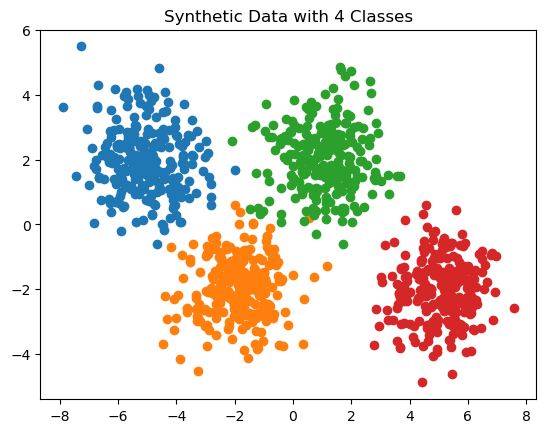

In [17]:
plt.scatter(cls1[:, 0], cls1[:, 1])
plt.scatter(cls2[:, 0], cls2[:, 1])
plt.scatter(cls3[:, 0], cls3[:, 1])
plt.scatter(cls4[:, 0], cls4[:, 1])
plt.title("Synthetic Data with 4 Classes")
plt.show()

In [18]:
model = Sequential([
    Input((2, )),
    Dense(units=4, activation="relu", name="L1"),
    Dense(units=4, activation="relu", name="L2"),
    Dense(units=4, activation="softmax", name="L3")
    
])

model.compile(optimizer=Adam(learning_rate=0.01), loss=SparseCategoricalCrossentropy())
model.fit(X_train, Y_train, epochs=300)


Epoch 1/300
32/32 [==============================] - 1s 2ms/step - loss: 1.1795
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 0.5923
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1802
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0584
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0377
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0315
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0241
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 11/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 12/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 13/300
32/32 [=================

67626/67626 [==============================] - 74s 1ms/step


2024-02-03 22:41:52.581351: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34624384 exceeds 10% of free system memory.


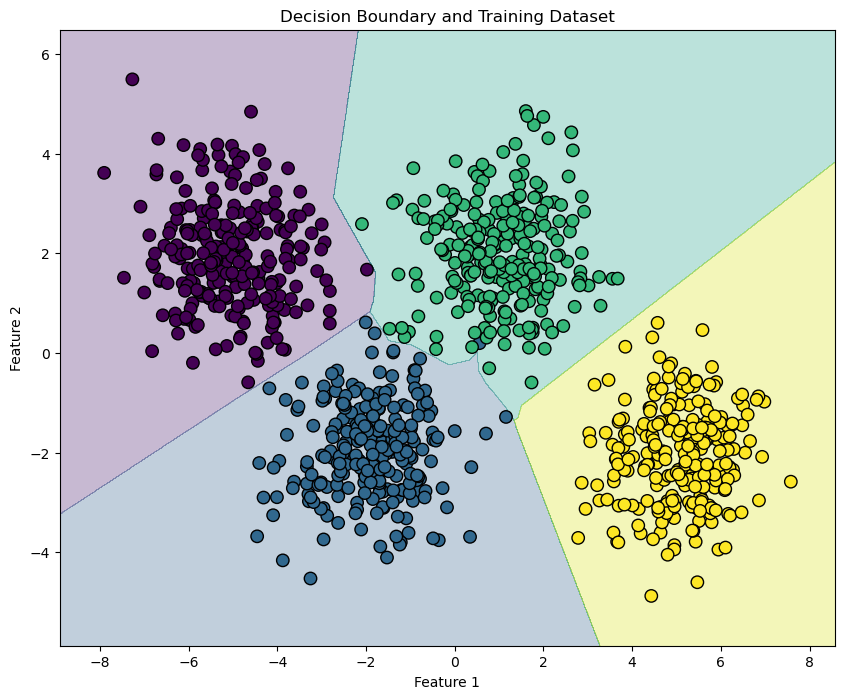

In [19]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


mesh_points = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(mesh_points)
predicted_labels = np.argmax(predictions, axis=1)


plt.figure(figsize=(10, 8))


plt.contourf(xx, yy, predicted_labels.reshape(xx.shape), alpha=0.3, cmap='viridis')


plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='viridis', edgecolors='k', marker='o', s=80)

plt.title('Decision Boundary and Training Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [21]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

# gather the trained parameters from the second layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# gather the trained parameters from the output layer
l3 = model.get_layer("L3")
W3, b3 = l2.get_weights()

print(W1)
print(b1)
print(W2)
print(b2)
print(W3)
print(b3)

[[ 2.2918007 -1.2721882  0.0305507 -1.5098408]
 [-0.7070433 -1.1954719  1.282557   1.5361804]]
[ 0.12620308  0.25316733  1.3087109  -1.7119817 ]
[[ 1.3058035   1.5779251  -0.31212026  1.4132723 ]
 [ 0.7287452  -2.6320784  -0.64144695  1.199061  ]
 [-0.28752813 -0.1688026   1.6471419  -0.27261308]
 [ 2.0849133   1.1182824  -0.2264935  -1.3101633 ]]
[-2.7578676 -1.7749586  1.571338   2.6707902]
[[ 1.3058035   1.5779251  -0.31212026  1.4132723 ]
 [ 0.7287452  -2.6320784  -0.64144695  1.199061  ]
 [-0.28752813 -0.1688026   1.6471419  -0.27261308]
 [ 2.0849133   1.1182824  -0.2264935  -1.3101633 ]]
[-2.7578676 -1.7749586  1.571338   2.6707902]
